# Surface Current Analyses Real-time (OSCAR) Surface Currents - Final 0.25 Degree (Version 2.0)

NASA Physical Oceanography Distributed Active Archive Center (PO.DAAC) (<podaac@podaac.jpl.nasa.gov>)

Jet Propulsion Laboratory, California Institute of Technology

<img src="https://podaac.jpl.nasa.gov/sites/default/files/image/custom_thumbs/podaac_logo.png" alt="Drawing" style="width: 100px;"/>


(Run this notebook in AWS US-WEST-2 to list all POCLOUD datasets)


This tutorial only works in a jupyterhub hosted at AWS US-WEST-2.


<img src="https://podaac.jpl.nasa.gov/Podaac/thumbnails/OSCAR_L4_OC_FINAL_V2.0.png" alt="Drawing" style="width: 600px;"/>


# A 4-minute demo of this dataset

## Existing collections in PODAAC CLOUD (AWS S3)

In [13]:
import utils
import pprint
import xarray as xr
from datetime import datetime
import warnings

warnings.simplefilter(action='ignore')

In [14]:
s3=utils.direct_s3()
podaac_s3='podaac-ops-cumulus-protected'
collections=s3.glob("podaac-ops-cumulus-protected/*")

#395 total collections in PODAAC CLOUD (POCLOUD) by 03/25/2022.
print(len(collections), "total collections in PODAAC CLOUD (POCLOUD) by %s."%datetime.today().strftime('%m/%d/%Y'))

405 total collections in PODAAC CLOUD (POCLOUD) by 04/14/2022.


In [15]:
wind_data=utils.find_dataset(keywords=['OSCAR'])

display(wind_data)

,short_name,long_name,concept_id,time_start,time_end
0,OSCAR_L4_OC_FINAL_V2.0,Ocean Surface Current Analyses Real-time (OSCA...,C2098858642-POCLOUD,1993-01-01T00:00:00.000Z,2021-01-01T00:00:00.000Z
1,OSCAR_L4_OC_INTERIM_V2.0,Ocean Surface Current Analyses Real-time (OSCA...,C2102959417-POCLOUD,2020-01-01T00:00:00.000Z,2022-01-01T00:00:00.000Z
2,OSCAR_L4_OC_NRT_V2.0,Ocean Surface Current Analyses Real-time (OSCA...,C2102958977-POCLOUD,2021-01-01T00:00:00.000Z,[NaT/Present]


The first column in the text shows the __short_name__, which is also the _folder_ name in the cloud storage (__a bucket__ in the AWS jargon). 

<div class="alert alert-block alert-warning">
Caveat: The utils.py module in this folder is ad hoc. It is not an official PODAAC tool and subject to change in the future. It has a couple of routines that use the core functions offered by NASA Earthdata. It is designed to provide a simpler interface for science users, who are not required to know these core functions in order to analyzing data in the cloud. But users are encouraged to dive deeper if interested. More learning materials can be found on <a href="https://openscapes.org">OpenScapes</a> website and <a href="https://github.com/podaac"> PODAAC github page </a>.
</div>

## Dive into one example OSCAR_L4_OC_FINAL_V2.0

We see three OSCAR surface velocity products in POCLOUD. Let's take a look at one example. I am using [OSCAR_L4_OC_FINAL_V2.0](https://podaac.jpl.nasa.gov/dataset/OSCAR_L4_OC_FINAL_V2.0). 

The full path within AWS S3 from this example is 
```podaac-ops-cumulus-protected/OSCAR_L4_OC_FINAL_V2.0/oscar_currents_final_19930101.nc```

* __podaac-ops-cumulus-protected__ is the _root_ folder for all PODAAC data within AWS S3. It is often referred to as 'bucket'. 
* __OSCAR_L4_OC_FINAL_V2.0__ is an unique __short_name__ for this particular dataset.
* __oscar_currents_final_19930101.nc__ is an L2 file, often refered to as __granule__. 


In [16]:
short_name="OSCAR_L4_OC_FINAL_V2.0"
fns=sorted(s3.glob(podaac_s3+'/%s/*nc'%short_name))
print('There are %i files in this dataset.'%len(fns))
print('The first five files are:')
pprint.pprint(fns[:5])
print('The last five files are:')
pprint.pprint(fns[-5:])

There are 10227 files in this dataset.
The first five files are:
['podaac-ops-cumulus-protected/OSCAR_L4_OC_FINAL_V2.0/oscar_currents_final_19930101.nc',
 'podaac-ops-cumulus-protected/OSCAR_L4_OC_FINAL_V2.0/oscar_currents_final_19930102.nc',
 'podaac-ops-cumulus-protected/OSCAR_L4_OC_FINAL_V2.0/oscar_currents_final_19930103.nc',
 'podaac-ops-cumulus-protected/OSCAR_L4_OC_FINAL_V2.0/oscar_currents_final_19930104.nc',
 'podaac-ops-cumulus-protected/OSCAR_L4_OC_FINAL_V2.0/oscar_currents_final_19930105.nc']
The last five files are:
['podaac-ops-cumulus-protected/OSCAR_L4_OC_FINAL_V2.0/oscar_currents_final_20201227.nc',
 'podaac-ops-cumulus-protected/OSCAR_L4_OC_FINAL_V2.0/oscar_currents_final_20201228.nc',
 'podaac-ops-cumulus-protected/OSCAR_L4_OC_FINAL_V2.0/oscar_currents_final_20201229.nc',
 'podaac-ops-cumulus-protected/OSCAR_L4_OC_FINAL_V2.0/oscar_currents_final_20201230.nc',
 'podaac-ops-cumulus-protected/OSCAR_L4_OC_FINAL_V2.0/oscar_currents_final_20201231.nc']


## Open and plot
Let's open one example and plot it. 

In [17]:
%%time
fns=sorted(s3.glob(podaac_s3+'/%s/*200712[1-2]*.nc'%short_name))
#fns+=sorted(s3.glob(podaac_s3+'/%s/*2008*.nc'%short_name))

data=xr.open_mfdataset([s3.open(fn) for fn in fns[:]],decode_times=False)
data

CPU times: user 1.95 s, sys: 369 ms, total: 2.32 s
Wall time: 4.13 s


<xarray.Dataset>
Dimensions:  (latitude: 719, longitude: 1440, time: 20)
Coordinates:
    lat      (latitude) float64 dask.array<chunksize=(719,), meta=np.ndarray>
    lon      (longitude) float64 dask.array<chunksize=(1440,), meta=np.ndarray>
  * time     (time) float64 6.552e+03 6.553e+03 6.554e+03 ... 6.57e+03 6.571e+03
Dimensions without coordinates: latitude, longitude
Data variables:
    u        (time, longitude, latitude) float64 dask.array<chunksize=(1, 1440, 719), meta=np.ndarray>
    v        (time, longitude, latitude) float64 dask.array<chunksize=(1, 1440, 719), meta=np.ndarray>
    ug       (time, longitude, latitude) float64 dask.array<chunksize=(1, 1440, 719), meta=np.ndarray>
    vg       (time, longitude, latitude) float64 dask.array<chunksize=(1, 1440, 719), meta=np.ndarray>
Attributes: (12/36)
    title:                      Ocean Surface Current Analyses Real-time (OSC...
    summary:                    Global, daily, 0.25 degree geostrophic and to...
    keywords:                   ocean currents,ocean circulation,surface curr...
    Conventions:                CF-1.8 Standard Names v77, ACDD-1.3, netcdf 4...
    id:                         OSCAR_L4_OC_FINAL_V2.0
    history:                    OSCAR 0.25 degree daily version 2.0 replaces ...
    ...                         ...
    geospatial_lon_max:         359.75
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  0.25 degree
    time_coverage_start:        2007-12-10T00:00:00
    time_coverage_end:          2007-12-10T23:59:59
    date_created:               2022-01-08

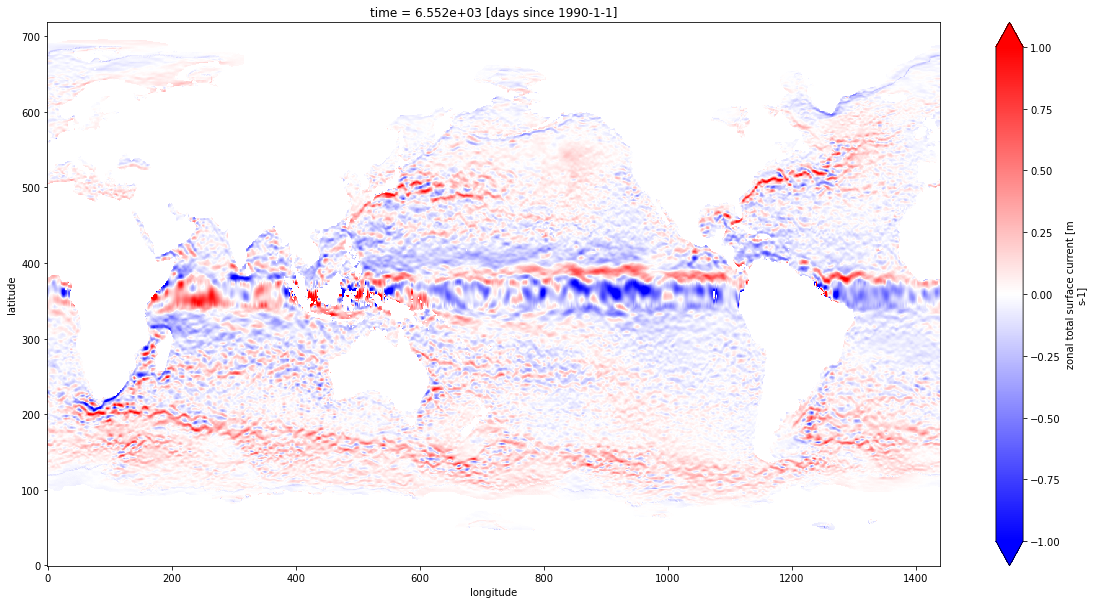

In [18]:
from matplotlib import pylab as plt

#open multiple files
fig,ax=plt.subplots(1,1,figsize=(20,10))

data['u'][0,...].T.plot(ax=ax,vmin=-1,vmax=1,cmap=plt.cm.bwr)

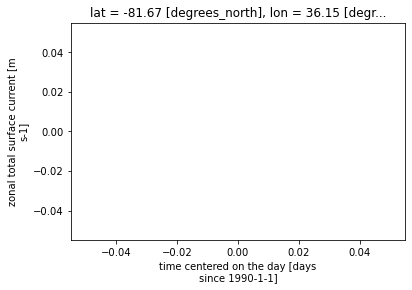

In [19]:
data['u'].interp(latitude=32.3,longitude=144.6).plot()